### Numpy array vs Python lists

###  1) speed

In [ ]:
# list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []
import time

start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time()-start)

3.2699835300445557


In [ ]:
# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b
print(time.time()-start)

0.06481003761291504


In [ ]:
3.26/0.06 # numpy array is almost 50 times faster

54.33333333333333

numpy array is static and not referential array.

### 2) memory


In [ ]:
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

81528048

In [4]:
import sys
a = np.arange(10000000)
sys.getsizeof(a)

80000112

### Numpy array is taking almost equal size of memory as of python list. But we can optimise it using int8 or int32. As colab bydefault store integer in int64.

In [5]:
a = np.arange(10000000,dtype=np.int32)
sys.getsizeof(a)

40000112

In [6]:
a = np.arange(10000000,dtype=np.int16) # it can store max 32000 numbers
sys.getsizeof(a)

20000112

In [ ]:
a = np.arange(10000000,dtype=np.int8) # it can store max 256 numbers
sys.getsizeof(a)

10000104

### 3) convenience
Numpy array is more convenient than python list.

### Advanced Indexing

In [13]:
# Normal Indexing and slicing

a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [9]:
a[1,2]

6

In [10]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

In [12]:
# Fancy Indexing

# extract 1,3,4 row through indexing
a[[0,2,3,5]] # provide index of all rows are want to extract

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [ ]:
# Fancy Indexing

# extract 1,3,4 row through indexing
a[:,[0,2,3]] # provide index of all columns are want to extract

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [14]:
# Boolean Indexing
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[48,  8, 96, 59],
       [14, 33, 76, 64],
       [68, 39, 54, 58],
       [56, 74, 76, 32],
       [56,  5, 45, 31],
       [56, 37, 95, 19]])

In [15]:
# find all numbers greater than 50
a[a > 50]

array([96, 59, 76, 64, 68, 54, 58, 56, 74, 76, 56, 56, 95])

In [16]:
# find out even numbers
a[a % 2 == 0]

array([48,  8, 96, 14, 76, 64, 68, 54, 58, 56, 74, 76, 32, 56, 56])

In [17]:
# find all numbers greater than 50 and are even

a[(a > 50) & (a % 2 == 0)]

array([96, 76, 64, 68, 54, 58, 56, 74, 76, 56, 56])

In [18]:
a[(a > 50) and (a % 2 == 0)]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### we have applied bitwise and "&" here not the logical and "AND" because whenever we are working on boolean values we use bitwise and.

In [19]:
# find all numbers not divisible by 7
a[~(a % 7 == 0)]

array([48,  8, 96, 59, 33, 76, 64, 68, 39, 54, 58, 74, 76, 32,  5, 45, 31,
       37, 95, 19])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [ ]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [ ]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b) # we can add 2 different shapes as well

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


### This addition is possible just because of broadcasting. Numpy do broadcasting automatically.

#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

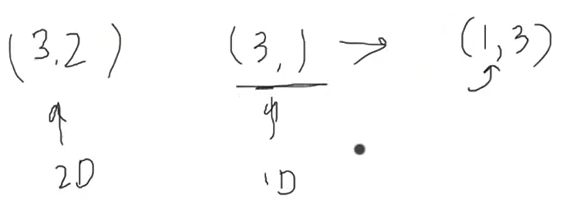

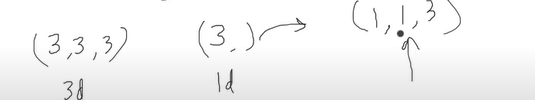

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

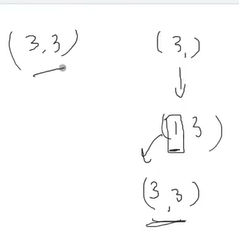



<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [ ]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: ignored

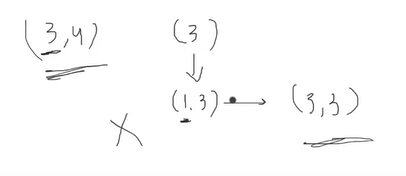

In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


No need to add 1 to head. We only stretch 1 to largest number.

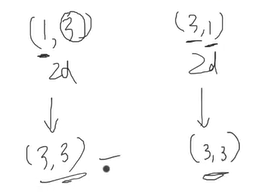

In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


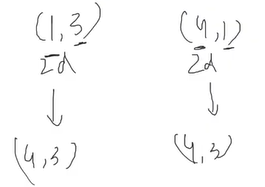

In [ ]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


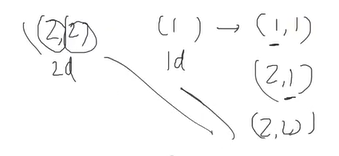

In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: ignored

In [ ]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: ignored

### Working with mathematical formulas

In [ ]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [ ]:
# sigmoid
def sigmoid(array):
  return 1/(1 + np.exp(-(array)))


a = np.arange(100)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [20]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [21]:
actual

array([21, 31, 32,  2,  7,  8, 15, 22, 17, 15, 42, 48, 12, 42, 38, 42, 13,
       43, 46, 48, 29, 48, 43, 26, 17])

In [22]:
predicted

array([40, 12, 11, 14, 12, 20,  1, 49, 22, 25, 30, 15,  7,  3, 39, 16,  5,
       21,  8, 10, 43, 13, 47, 24,  5])

In [23]:
def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

mse(actual,predicted)

440.12

### Working with missing values

In [ ]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In python, None and np.nan both are different.

In [ ]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

### Plotting Graphs

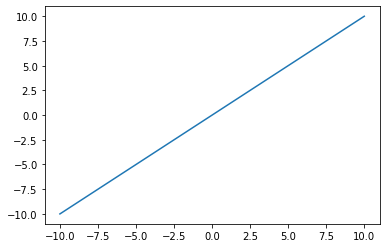

In [ ]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100) # taking 100 equidistant numbers between -10 and 10
y = x

plt.plot(x,y)

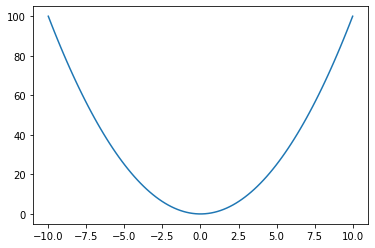

In [ ]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

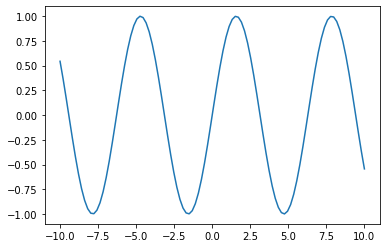

In [ ]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

<ipython-input-137-4b3958c08378>:3: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


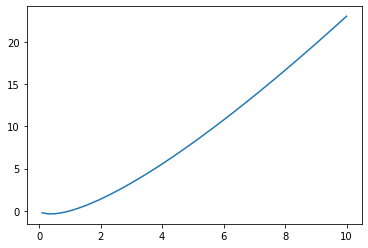

In [ ]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x * np.log(x)

plt.plot(x,y)

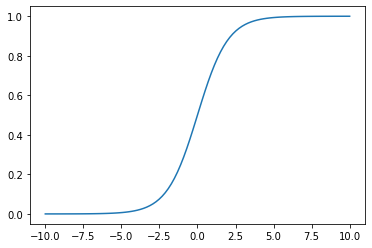

In [ ]:
# sigmoid
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)

### Meshgrids

In [ ]:
# Meshgrids